# Takehome ML Exercise 1BStories


In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [128]:
face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
img = cv2.imread('samples/sample_3.png')

In [23]:
faces = face_cascade.detectMultiScale(img)

In [32]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

In [33]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 175.5, 285.5, -0.5)

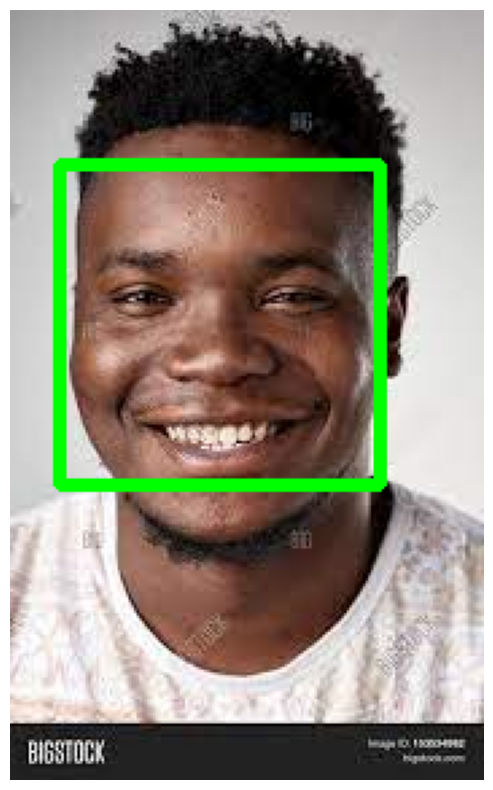

In [34]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [126]:
img.shape[:2]

(286, 176)

In [77]:
def find_largest_safe_zone(img_path, left_pct, right_pct, top_pct, bottom_pct, faces):
    # Load the image
    img = cv2.imread(img_path)
    img_height, img_width = img.shape[:2]

    # Calculate the boundary limits
    left_bound = int(left_pct * img_width)
    right_bound = int((1 - right_pct) * img_width)
    top_bound = int(top_pct * img_height)
    bottom_bound = int((1 - bottom_pct) * img_height)

    # Initialize the binary matrix based on some discretization
    # Note: For simplicity, let's assume we're working with the full pixel grid
    binary_matrix = np.ones((img_height, img_width), dtype=int)
    
    # Mark areas outside the allowed boundaries as occupied (0)
    binary_matrix[:, :left_bound] = 0
    binary_matrix[:, right_bound:] = 0
    binary_matrix[:top_bound, :] = 0
    binary_matrix[bottom_bound:, :] = 0

    # Mark areas occupied by faces as occupied (0)
    for x, y, w, h in faces:
        binary_matrix[y:y+h, x:x+w] = 0

#     # Here, you would integrate the dynamic programming approach to find the largest 0-area
#     # This requires adapting the maximal_rectangle function to work with this setup
#     # For now, this part is left as a placeholder

#     # Placeholder for the largest safe zone calculation
#     safe_zone = (0, 0, 0, 0)  # This would be replaced by the actual calculation

    return binary_matrix

In [78]:
faces = face_cascade.detectMultiScale(img)

In [127]:
faces

array([[ 18,  57, 119, 119]], dtype=int32)

In [79]:
binary_array = find_largest_safe_zone('samples/sample_2.jpeg', 0.05, 0.05, 0.05, 0.05, faces)

In [80]:
len(binary_array)

286

In [81]:
binary_array[20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(-0.5, 175.5, 285.5, -0.5)

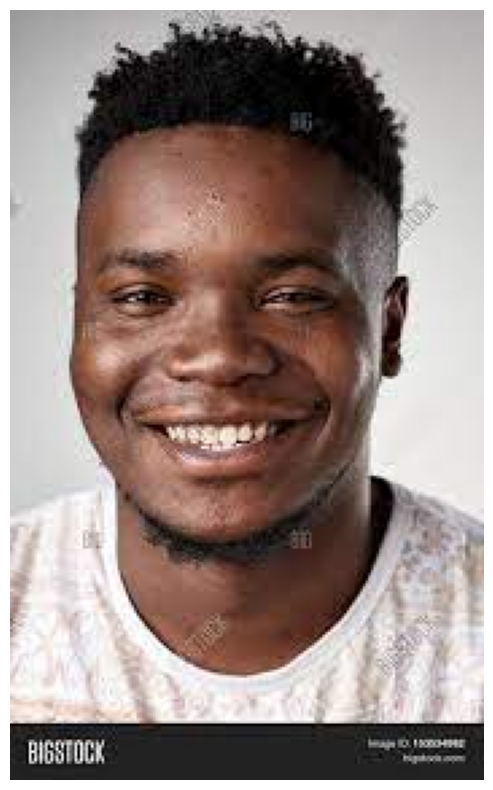

In [64]:
# Cascade model
face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')

# img is the original image
img = cv2.imread('samples/sample_2.jpeg')

# faces consists of multiple faces detected 
faces = face_cascade.detectMultiScale(img)

## this part is not used, but to show the return function of the cascade model
# for (x, y, w, h) in faces:
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

# convert image for pyplot
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [41]:
def calculate_cropped_coordinates(image, left_pct, right_pct, top_pct, bottom_pct):
    h, w = image.shape[:2]
    left = int(w * left_pct)
    right = w - int(w * right_pct)
    top = int(h * top_pct)
    bottom = h - int(h * bottom_pct)
    return left, top, right, bottom


In [42]:
def detect_faces_within_area(image, area):
    """
    Detect faces within a specific area of the image.
    """
    left, top, right, bottom = area
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    cropped_image = image[top:bottom, left:right]
    faces = face_cascade.detectMultiScale(cropped_image, scaleFactor=1.1, minNeighbors=4)
    # Adjust face coordinates to match the original image's coordinate system
    adjusted_faces = [(x + left, y + top, w, h) for (x, y, w, h) in faces]
    return adjusted_faces


In [43]:
def find_largest_safe_zone(image, faces, cropped_area):
    """
    Find the largest rectangle (safe zone) within the cropped area that does not overlap with any faces.
    """
    left, top, right, bottom = cropped_area
    cropped_width = right - left
    cropped_height = bottom - top

    # Initialize variables to track the largest safe zone found
    largest_area = 0
    largest_safe_zone = None

    # Iterate over the cropped area with a step size to search for potential safe zones
    step_size = 10  # Adjust step size for finer or coarser search
    for x in range(left, right, step_size):
        for y in range(top, bottom, step_size):
            for width in range(cropped_width, step_size, -step_size):
                for height in range(cropped_height, step_size, -step_size):
                    if x + width > right or y + height > bottom:
                        continue  # Skip if the rectangle extends beyond the cropped area
                    potential_safe_zone = (x, y, x + width, y + height)
                    if not any_faces_overlap(potential_safe_zone, faces):
                        area = width * height
                        if area > largest_area:
                            largest_area = area
                            largest_safe_zone = potential_safe_zone
                            # Break inner loops early if a large enough area is found
                            break
                if largest_safe_zone:
                    break
            if largest_safe_zone:
                break
        if largest_safe_zone:
            break

    return largest_safe_zone

def any_faces_overlap(safe_zone, faces):
    """
    Check if any faces overlap with the proposed safe zone.
    """
    sz_x1, sz_y1, sz_x2, sz_y2 = safe_zone
    for (f_x, f_y, f_w, f_h) in faces:
        f_x2, f_y2 = f_x + f_w, f_y + f_h
        if sz_x1 < f_x2 and sz_x2 > f_x and sz_y1 < f_y2 and sz_y2 > f_y:
            return True  # Overlap detected
    return False

In [44]:
def draw_safe_zone(image, safe_zone):
    """
    Draw a green rectangle around the safe zone.
    """
    x1, y1, x2, y2 = safe_zone
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
    return image

In [47]:
img = cv2.imread('samples/sample_2.jpeg')

In [48]:
cropped_area = calculate_cropped_coordinates(img, 0.05, 0.1, 0.05, 0.15)


In [49]:
faces = detect_faces_within_area(img, cropped_area)


In [50]:
safe_zone = find_largest_safe_zone(img, faces, cropped_area)


In [51]:
result_img = draw_safe_zone(img, safe_zone)


In [52]:
img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)


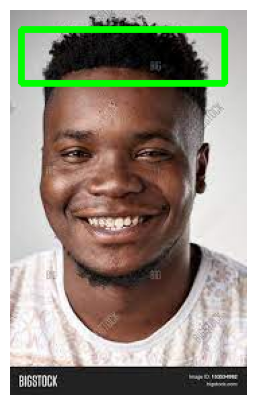

In [53]:
plt.figure(figsize=(10, 5))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [118]:
def maximal_rectangle(matrix):
    if not matrix or not matrix[0]:
        return 0

    max_area = 0
    n = len(matrix)
    m = len(matrix[0])
    height = [0] * m
    left = [0] * m
    right = [m] * m
    
    x, y, w, h = int(), int(), int(), int()

    for i in range(n):
        cur_left, cur_right = 0, m
        # Update height
        for j in range(m):
            if matrix[i][j] == '1':
                height[j] += 1
            else:
                height[j] = 0
        # Update left
        for j in range(m):
            if matrix[i][j] == '1':
                left[j] = max(left[j], cur_left)
            else:
                left[j] = 0
                cur_left = j + 1
        # Update right
        for j in range(m-1, -1, -1):
            if matrix[i][j] == '1':
                right[j] = min(right[j], cur_right)
            else:
                right[j] = m
                cur_right = j
        # Compute the area of rectangle (can do this for every row)
        for j in range(m):
            if (right[j] - left[j]) * height[j] > max_area:
                x = left[j]
                y = n - (i - height[j] + 1) - 1
                w = (right[j] - left[j])
                h = height[j]
            max_area = max(max_area, (right[j] - left[j]) * height[j])
            

    return max_area, x, y, w, h

# Example binary matrix (1 represents an occupied cell, and 0 represents an unoccupied cell)
matrix = [
    ["0", "0", "1", "1", "0"],
    ["0", "0", "1", "1", "0"],
    ["0", "0", "1", "1", "0"],
    ["0", "0", "1", "1", "0"]
]

maximal_rectangle(matrix)

(8, 2, 3, 2, 4)

In [87]:
type(matrix)

list

In [96]:
array = binary_array.astype(str).tolist()

In [120]:
area, x, y, w, h = maximal_rectangle(array)

In [121]:
def draw_safe_zone(image, safe_zone):
    """
    Draw a green rectangle around the safe zone.
    """
    x1, y1, x2, y2 = safe_zone
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
    return image

In [123]:
result_img = draw_safe_zone(img, (x, y, w, h))

In [124]:
img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)


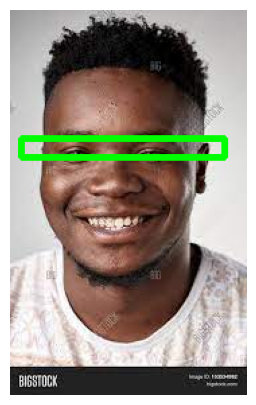

In [125]:
plt.figure(figsize=(10, 5))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()